# PHZ1140C Scratch Pad

## Tips

  * Use __esc r__ to disable a cell
  * Use __esc y__ to reactivate it
  * Use __esc m__ to go to markdown mode
  * Shift + return to execute a cell

Click [here](https://www.w3schools.com/python/default.asp) for an excellent Python online tutorial.

### Import Modules 
Make Python modules (that is, collections of programs) available to this notebook.


In [1]:
import os, sys
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import sympy as sm
#import scipy as sp
#import pandas as pd
#import vpython as vp
#import itertools as it

sm.init_printing()        # activate "pretty printing" of symbolic expressions
%matplotlib inline

### Setup fonts

In [2]:
# update fonts
FONTSIZE = 14
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# use latex if available on system, otherwise set usetex=False
mp.rc('text', usetex=True)

# set a seed to ensure reproducibility 
# on a given machine
seed = 314159
rnd  = np.random.RandomState(seed)

### My first program

  1. The most important rule in writing software (aka computer code) that you expect to come back to later, or give to someone else, is to make the computer code as easy to understand as possible. Often this can be achieved by following the rules of a coding style. However, if a rule conflicts with the desire for clarity, always choose the clarity! Rules are guidelines.

  2. The next most important rule, which follows from the first is to avoid writing very long dense programs. But even this rule must be broken sometimes. However, when it is be sure to structure the long dense program into clearly identifiable blocks of code.

  3. Python has two ways to structure software: __functions__ and __classes__. A function in Python is like a function, $\color{blue}{y = f(x)}$, in mathematics. In both cases, a function can be thought of as a machine that takes as input a quantity $x$ and returns another quantity $y$. In principle, the input and output quantities can be of arbitrary complexity. In the future, for example, the function $f$ might be an AI system and $x$ a collection of time series of quantities measured with an *in situ* health monitor while $y$ is a long array of probabilities each corresponding to a different potential medical condition.
However, unlike functions in mathematics, which always return a quantity, a function in Python (and many other computer languages) may not have a return value. Indeed, our first program below does not have a return value.


### My first program
Functions start with the keyword __def__.

In [3]:
# define the function
def hello_world():
    print('hello world!')

In [4]:
# execute (i.e., "call") the function
hello_world()

hello world!


### Something more interesting

Let's write a Python function that plots a given 1-dimensional function, $y = f(x)$, where $x$ is a real number.

In [5]:
def plot_function(f, xmin, xmax, 
                  ymin=None, ymax=None,
                  xbins=100, color='blue', filename='f.png', ftsize=14, fgsize=(5, 3)):
    '''
 
    Example

    >>> f = np.sin
    >>> plot_function(f, xmin, xmax, color='blue') 
    '''

    # set size of figure
    fig = plt.figure(figsize=fgsize)

    # compute y = f(x) at equally-spaced values of x
    # ------------------------------------------------
    # Q1: What do you think is happening in the next three lines?
    xstep = (xmax-xmin)/xbins
    x = np.arange(xmin, xmax+xstep, xstep)
    y = f(x)

    # define domain
    plt.xlim(xmin, xmax)
    
    # define range
    if ymax == None:
        ymax = y.max()
        ymax *= 1.25  # Q2: What do you think is the function of the operator "*=" ?
        
    if ymin == None:
        ymin = y.min()
        # Q3: Why are we checking if y is negative?
        if ymin < 0:
            ymin *= 1.25
        else:
            ymin *= 0.75
            
    plt.ylim(ymin, ymax)
        
    # annotate axes
    plt.xlabel('$x$', fontsize=ftsize)
    plt.ylabel('$y$', fontsize=ftsize)

    plt.plot(x, y, color=color, label='$y = f(x)$')
    plt.grid()
    
    plt.legend(loc='upper right') # activate legend
    
    fig.tight_layout()
    plt.savefig(filename)

### The Python __help__ function

In [6]:
help(plot_function)

Help on function plot_function in module __main__:

plot_function(f, xmin, xmax, ymin=None, ymax=None, xbins=100, color='blue', filename='f.png', ftsize=14, fgsize=(5, 3))
    Example
    
    >>> f = np.sin
    >>> plot_function(f, xmin, xmax, color='blue')



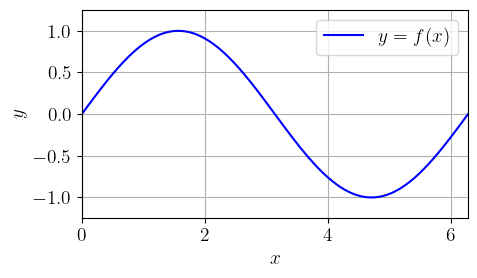

In [7]:
plot_function(np.sin, xmin=0, xmax=2*np.pi)

### Lambda functions

Format:
```python
g = lambda x: some functional form
```

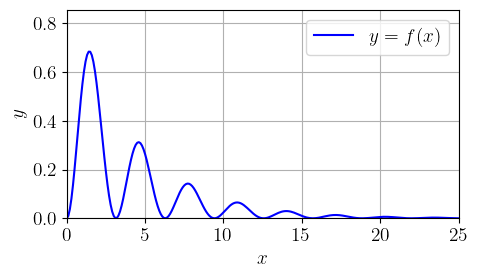

In [8]:
g = lambda x: np.exp(-x/4)*np.sin(x)**2
plot_function(g, xmin=0, xmax=25, xbins=250)

### Using __sympy__

In [9]:
x = sm.symbols('x', real=True)

# create a function
h = sm.exp(-x/4)*sm.sin(x)**2

# display it with pretty printer
h

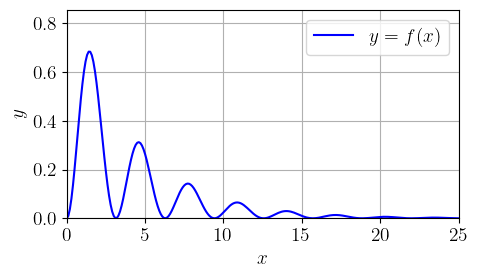

In [10]:
q = lambda z: h.evalf(subs={x:z})
plot_function(g, xmin=0, xmax=25, xbins=250)

### Numbers, numbers, numbers!

In [11]:
# smallest and largest floating point numbers and largest integer in Python
sys.float_info.min, sys.float_info.max, sys.maxsize

### $1000!$

In [12]:
import math
N = 1000

s = f'{math.factorial(N):d}'

len(s), s

(2568,
 '4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238

### Beware of machine precision and truncation

This example is taken from the description of the __evalf(...)__ function in sympy.

We want to compute $g = 10^{16} + 1 -  10^{16}$. The correct answer of course is 1. However, if the precision of the calculation (that is, the number of significant figures) is insufficient, the $10^{16} + 1$ will be evaluated as $10^{16}$ and this will yield the answer 0! But __sympy__ has a more precise way to evaluate functions. See the example in the cell below.

In [13]:
x, y, z = sm.symbols('x, y, z')

# Q4: What is the largest power of ten that avoids truncation, that is, what value of "k" gives 10**k + 1 - 10**k = 1?
value  = 1e16
values = {x: value, y: 1, z: value}

g = x + y - z

# evaluate the expression numerically
g1 = float(g.subs(values))

# Use evalf to evaluate the function g(x, y, z) with greater precision
g2 = float(g.evalf(subs=values))

print(f'g1: {g1:f}\tg2: {g2:f}')

g1: 0.000000	g2: 1.000000
